In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
#torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [6]:
shuffled_indices = torch.randperm(n_samples)

In [7]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

tensor([ 4,  5,  2,  6,  8, 10,  9,  0,  7]) tensor([1, 3])


In [8]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [9]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [10]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [11]:
train_loss_list = []
val_loss_list = []
#epoch_list = []

In [12]:
def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        val_loss_list.append(val_loss.item())
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        
        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")
    
    return params

In [13]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [14]:
t_un = 0.1 * t_u

In [15]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 519.7859, Validation loss 1377.8323
Epoch 500, Training loss 1.8331, Validation loss 13.6555
Epoch 1000, Training loss 1.8231, Validation loss 12.9343
Epoch 1500, Training loss 1.8133, Validation loss 12.0619
Epoch 2000, Training loss 1.8059, Validation loss 11.2070
Epoch 2500, Training loss 1.8015, Validation loss 10.4798
Epoch 3000, Training loss 1.7996, Validation loss 9.9441
Epoch 3500, Training loss 1.7989, Validation loss 9.6099
Epoch 4000, Training loss 1.7988, Validation loss 9.4400
Epoch 4500, Training loss 1.7988, Validation loss 9.3736
Epoch 5000, Training loss 1.7988, Validation loss 9.3551


tensor([ 0.1012,  0.5501, -6.0823], requires_grad=True)

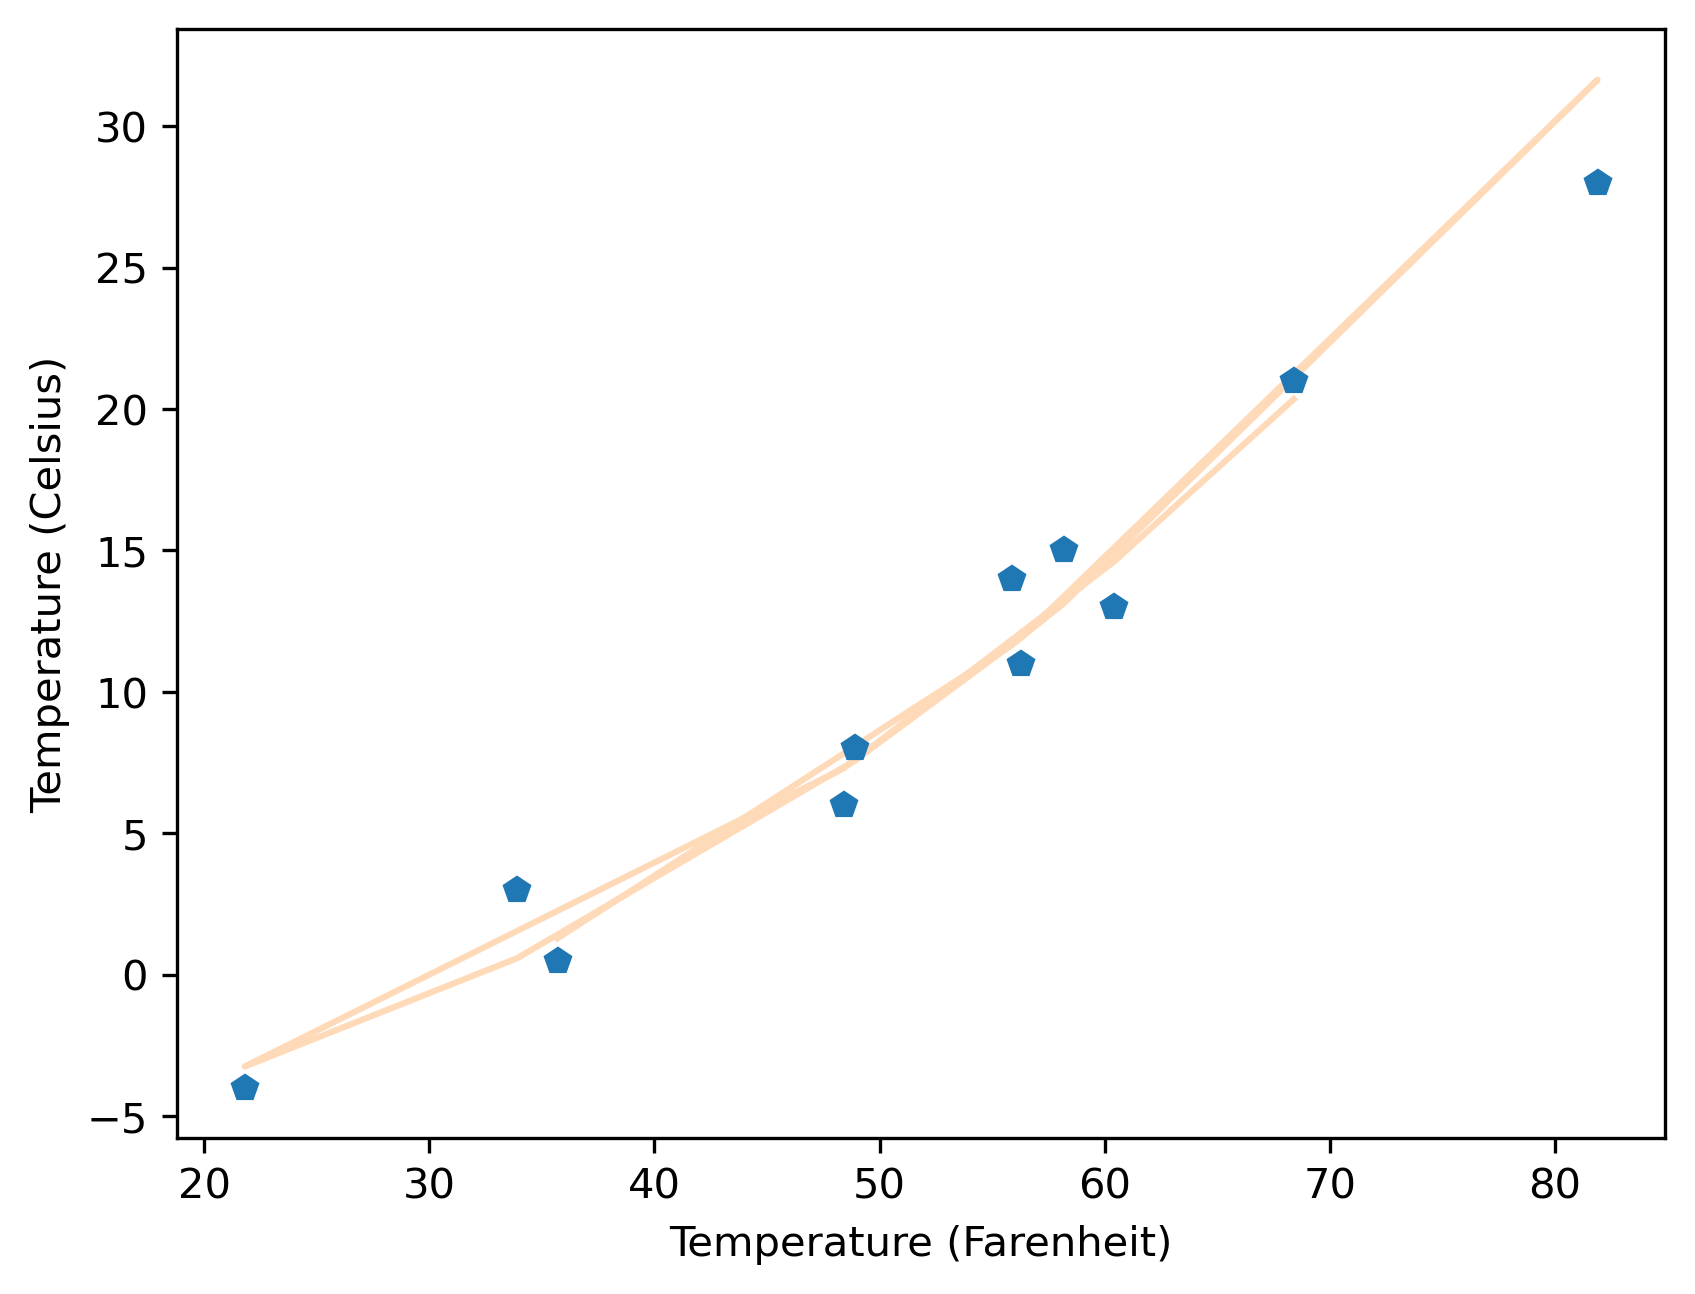

In [16]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

In [17]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 519.7859, Validation loss 1377.8323
Epoch 500, Training loss 6.4291, Validation loss 4.5225
Epoch 1000, Training loss 3.5718, Validation loss 3.1108
Epoch 1500, Training loss 2.2457, Validation loss 6.7859
Epoch 2000, Training loss 1.8943, Validation loss 10.9993
Epoch 2500, Training loss 1.8424, Validation loss 13.2007
Epoch 3000, Training loss 1.8371, Validation loss 13.7966
Epoch 3500, Training loss 1.8348, Validation loss 13.7756
Epoch 4000, Training loss 1.8320, Validation loss 13.5993
Epoch 4500, Training loss 1.8289, Validation loss 13.3682
Epoch 5000, Training loss 1.8252, Validation loss 13.0897


tensor([-0.6664,  0.6324, -4.4482], requires_grad=True)

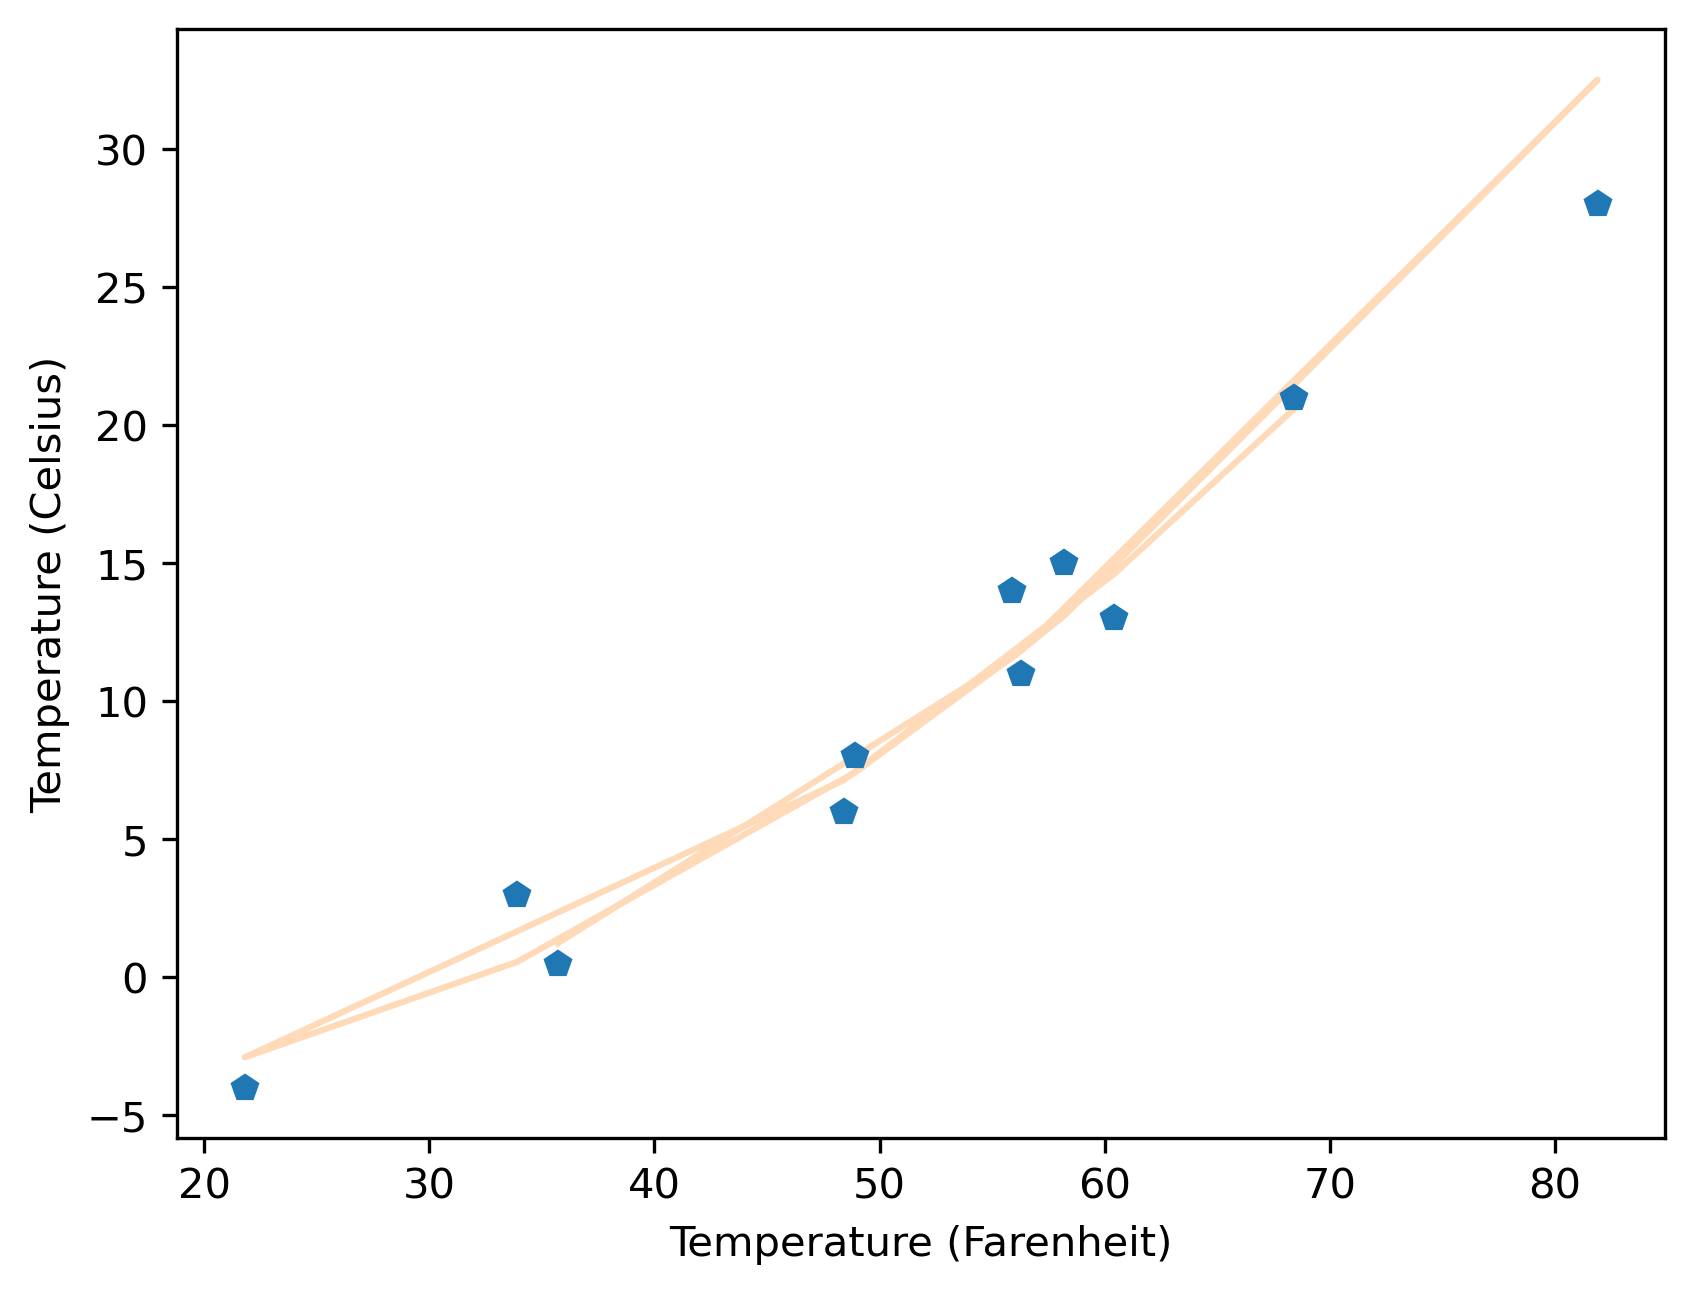

In [18]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

In [19]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 519.7859, Validation loss 1377.8323
Epoch 500, Training loss 87.5958, Validation loss 162.9495
Epoch 1000, Training loss 13.4346, Validation loss 0.9132
Epoch 1500, Training loss 8.7090, Validation loss 5.7738
Epoch 2000, Training loss 8.2820, Validation loss 7.3488
Epoch 2500, Training loss 7.8330, Validation loss 6.6663
Epoch 3000, Training loss 7.2956, Validation loss 5.7663
Epoch 3500, Training loss 6.6758, Validation loss 4.8303
Epoch 4000, Training loss 5.9894, Validation loss 3.9517
Epoch 4500, Training loss 5.2624, Validation loss 3.2530
Epoch 5000, Training loss 4.5309, Validation loss 2.8763


tensor([-0.1546,  0.4611, -1.9273], requires_grad=True)

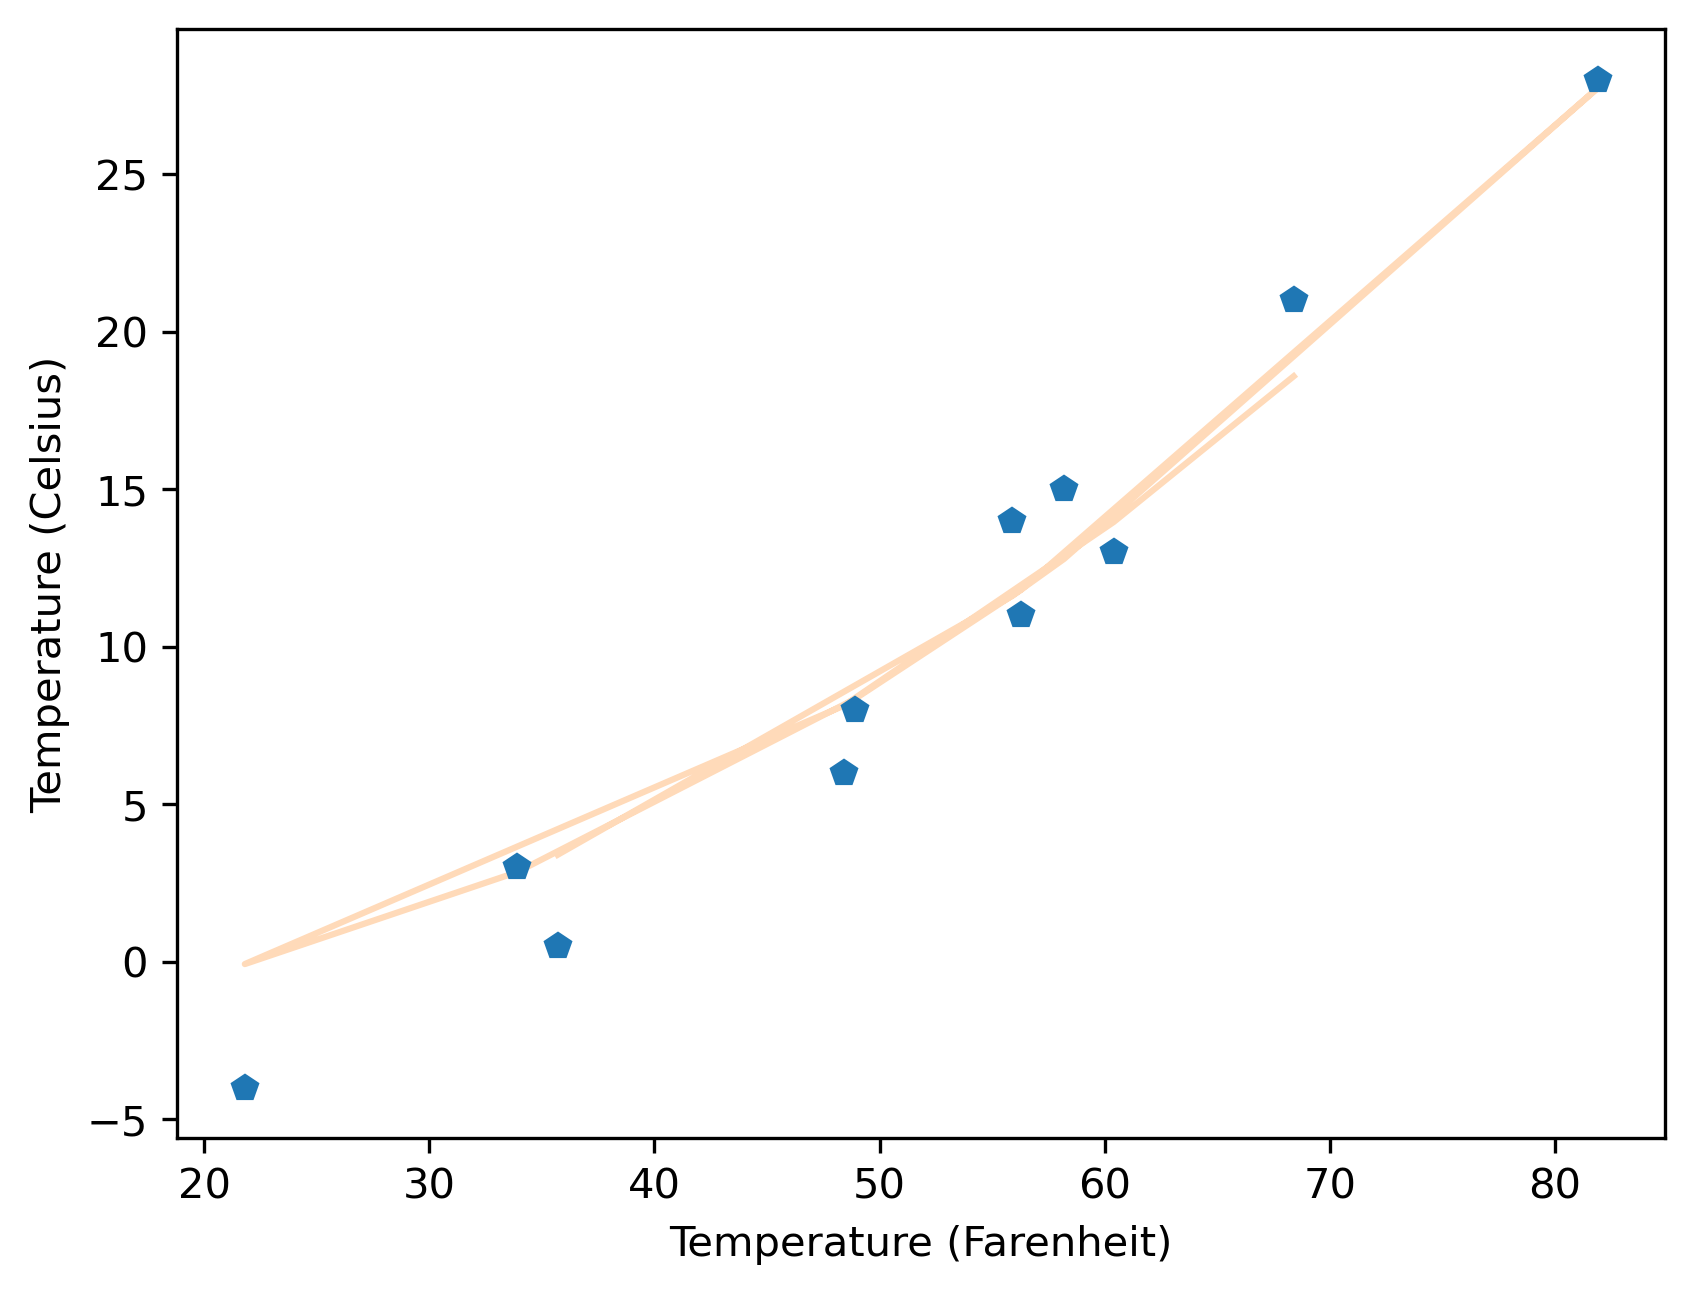

In [20]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

In [21]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 519.7859, Validation loss 1377.8323
Epoch 500, Training loss 447.2988, Validation loss 1167.2705
Epoch 1000, Training loss 382.3910, Validation loss 980.0179
Epoch 1500, Training loss 324.4459, Validation loss 814.1627
Epoch 2000, Training loss 272.8312, Validation loss 667.7673
Epoch 2500, Training loss 227.0313, Validation loss 539.2454
Epoch 3000, Training loss 186.6240, Validation loss 427.2912
Epoch 3500, Training loss 151.2583, Validation loss 330.8061
Epoch 4000, Training loss 120.6321, Validation loss 248.8293
Epoch 4500, Training loss 94.4727, Validation loss 180.4769
Epoch 5000, Training loss 72.5197, Validation loss 124.8842


tensor([ 0.5668,  0.5693, -0.4369], requires_grad=True)

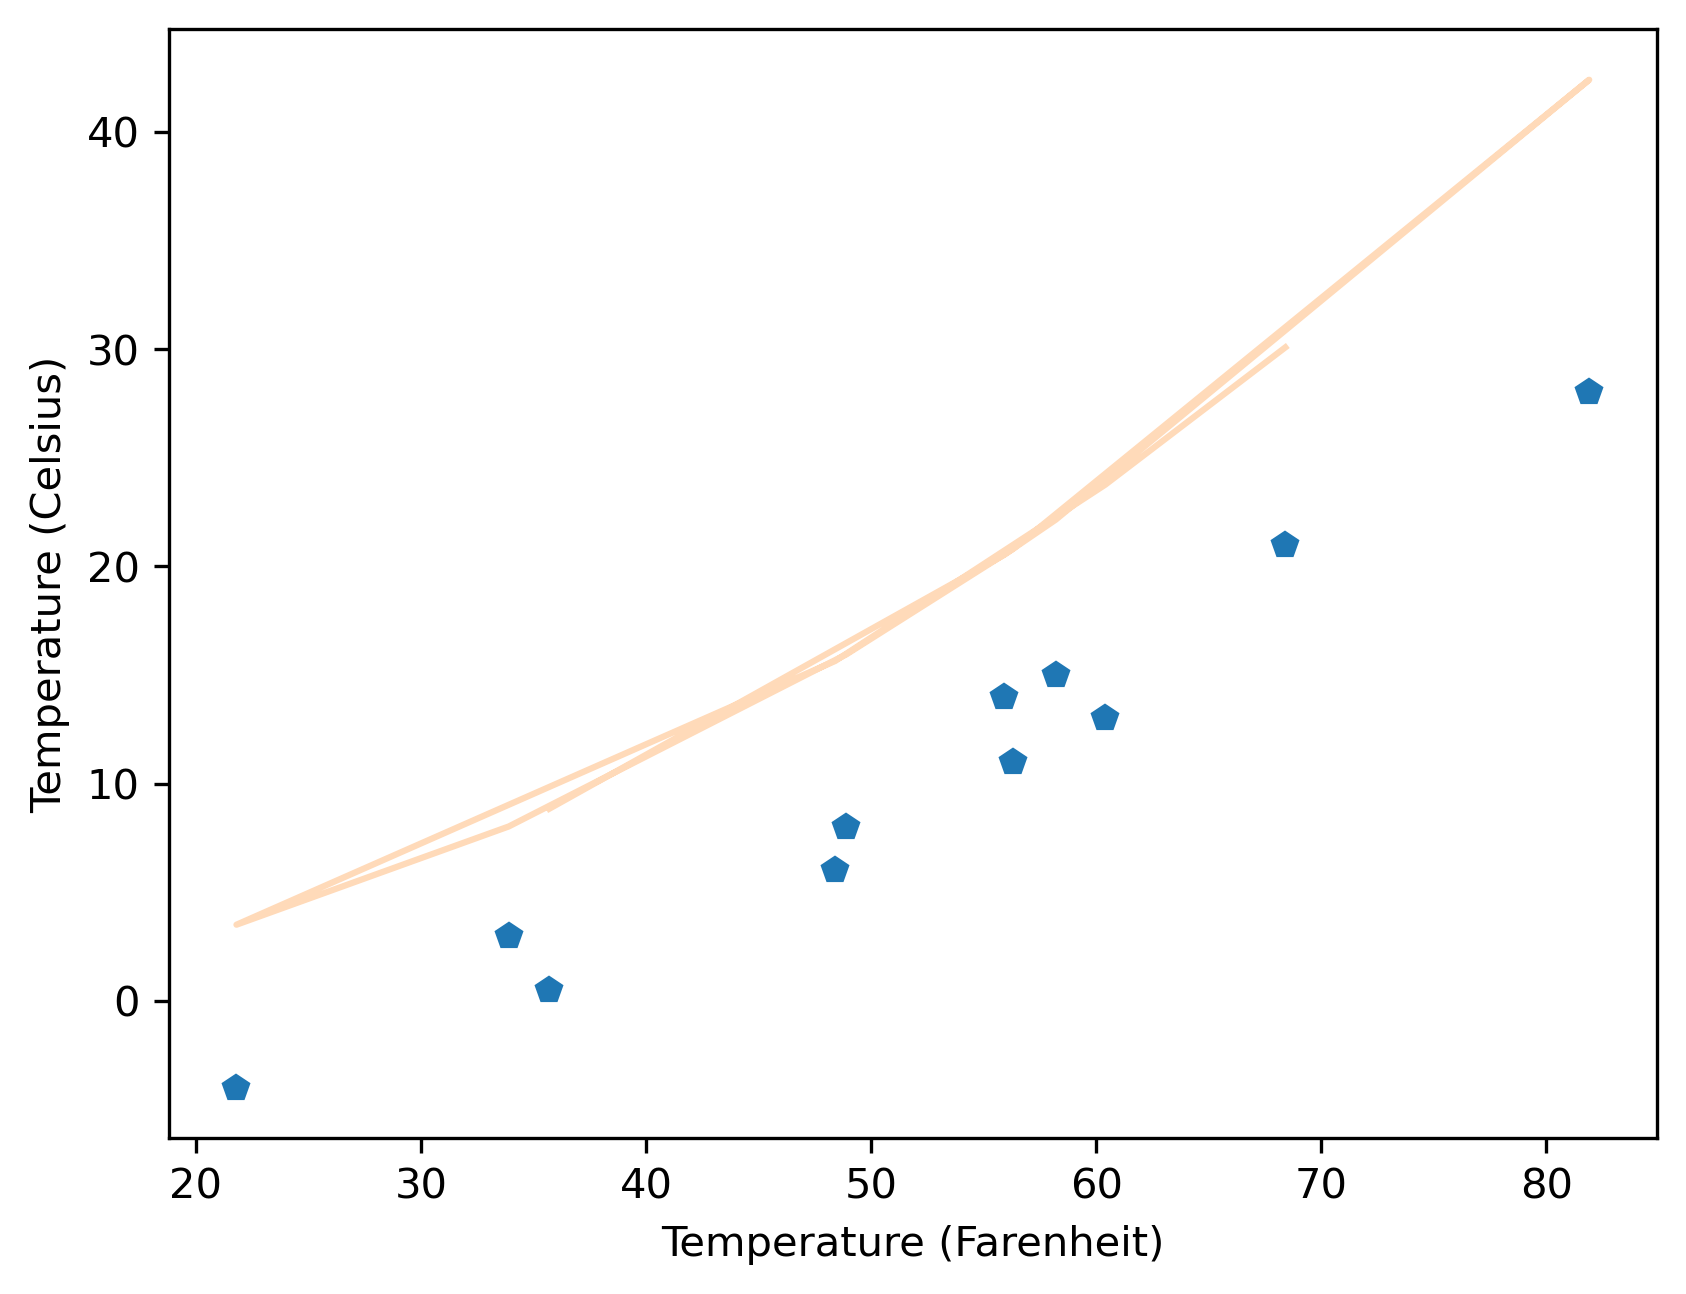

In [22]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')